# PREDICCION DE PRECIOS DE AGUACATE EN EEUU





* Ale Gudiel 19232
* Sofia Rueda 19099

# Enunciado del Problema

- Los datos representan ventas semanales desde 2015 a 2018 a nivel de todos los EEUU. 
- Los datos provienen directamente de las cajas registradoras basados en ventas de aguacate variedad Hass. 
- El precio promedio de los aguacates reflejan el costo por unidad, aún cuando estos se vendan por bolsas. 
- Los códigos (Product Lookup codes ó PLU) en la tabla son solo de aguacates Hass.  No se incluyen otras variedades.

Columnas relevantes en el conjunto de datos:

- Date - la fecha de la observación
- AveragePrice - el precio promedio de una unidad
- type - convencional u orgánico
- year - el año
- Region - la ciudad o región de la observación
- Total Volume - número total de aguacates vendidos
- 4046 - número total de aguacates con PLU 4046 vendidos
- 4225 - número total de aguacates con PLU 4225 vendidos
- 4770 - número total de aguacates con PLU 4770 vendidos



# Importar las librerías

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random
import seaborn as sns
from fbprophet import Prophet

# Carga de datos

In [2]:
df = pd.read_csv("aguacates_EEUU.csv", index_col= 'Unnamed: 0')

# Explorar el conjunto de datos  

In [3]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


# Asegurar que estén los datos en orden cronológico

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df = df.sort_values("Date")
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


# Realizar una gráfica de precios promedio vrs fecha

¿Cuál es la tendencia a nivel nacional?

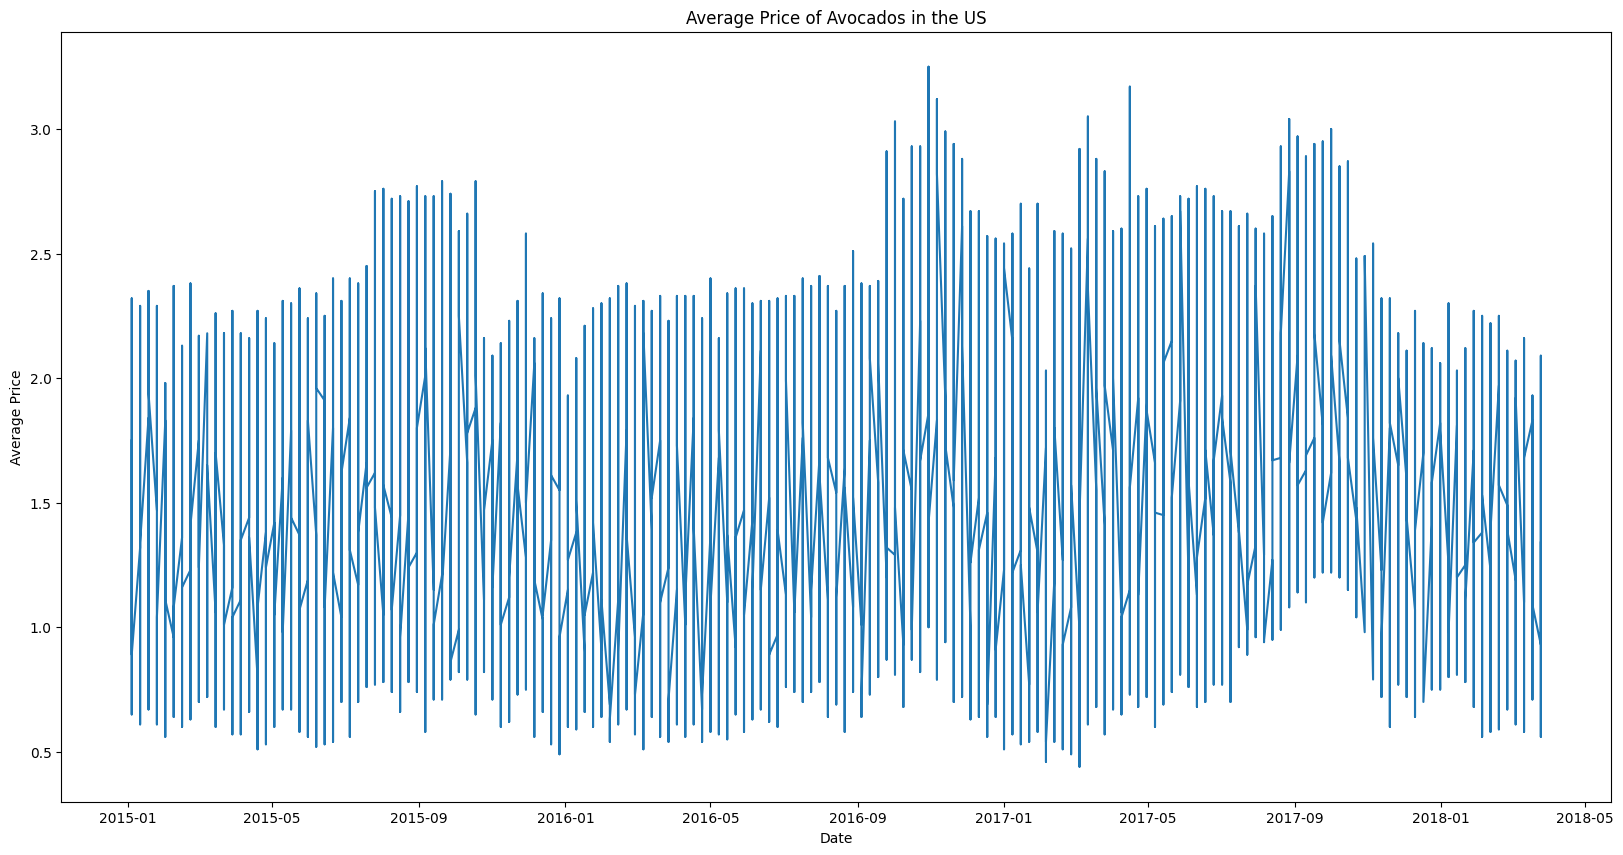

In [7]:
plt.figure(figsize=(20,10))
plt.plot(df['Date'], df['AveragePrice'])
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price of Avocados in the US')
plt.savefig('./graphs/Average Price of Avocados in the US.png')
plt.show()

# Realizar una gráfica de barras para ver el número de regiones

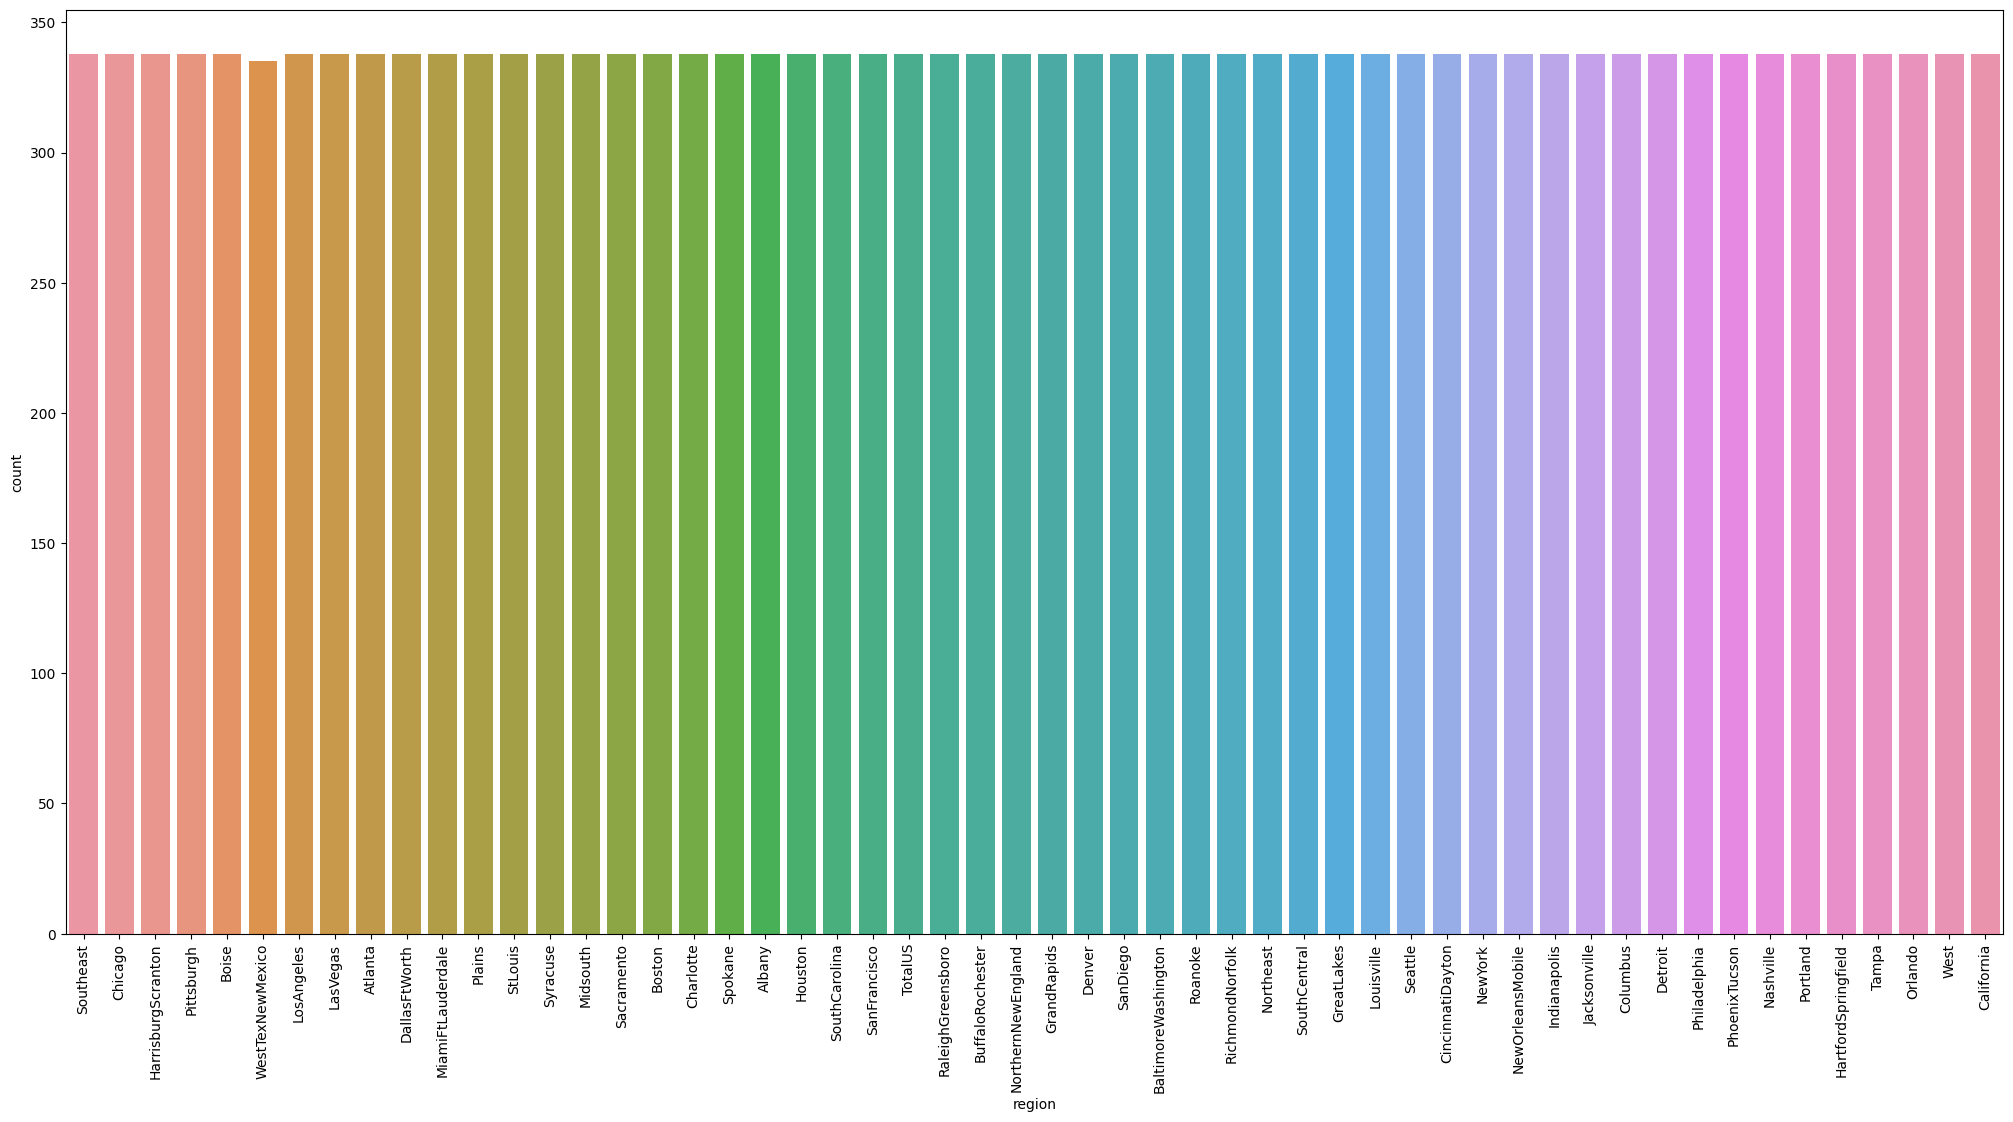

In [8]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = df)
plt.xticks(rotation = 90)
plt.savefig('./graphs/Regions in dataset.png')

# Realizar una gráfica de barras para ver de qué años se tiene información

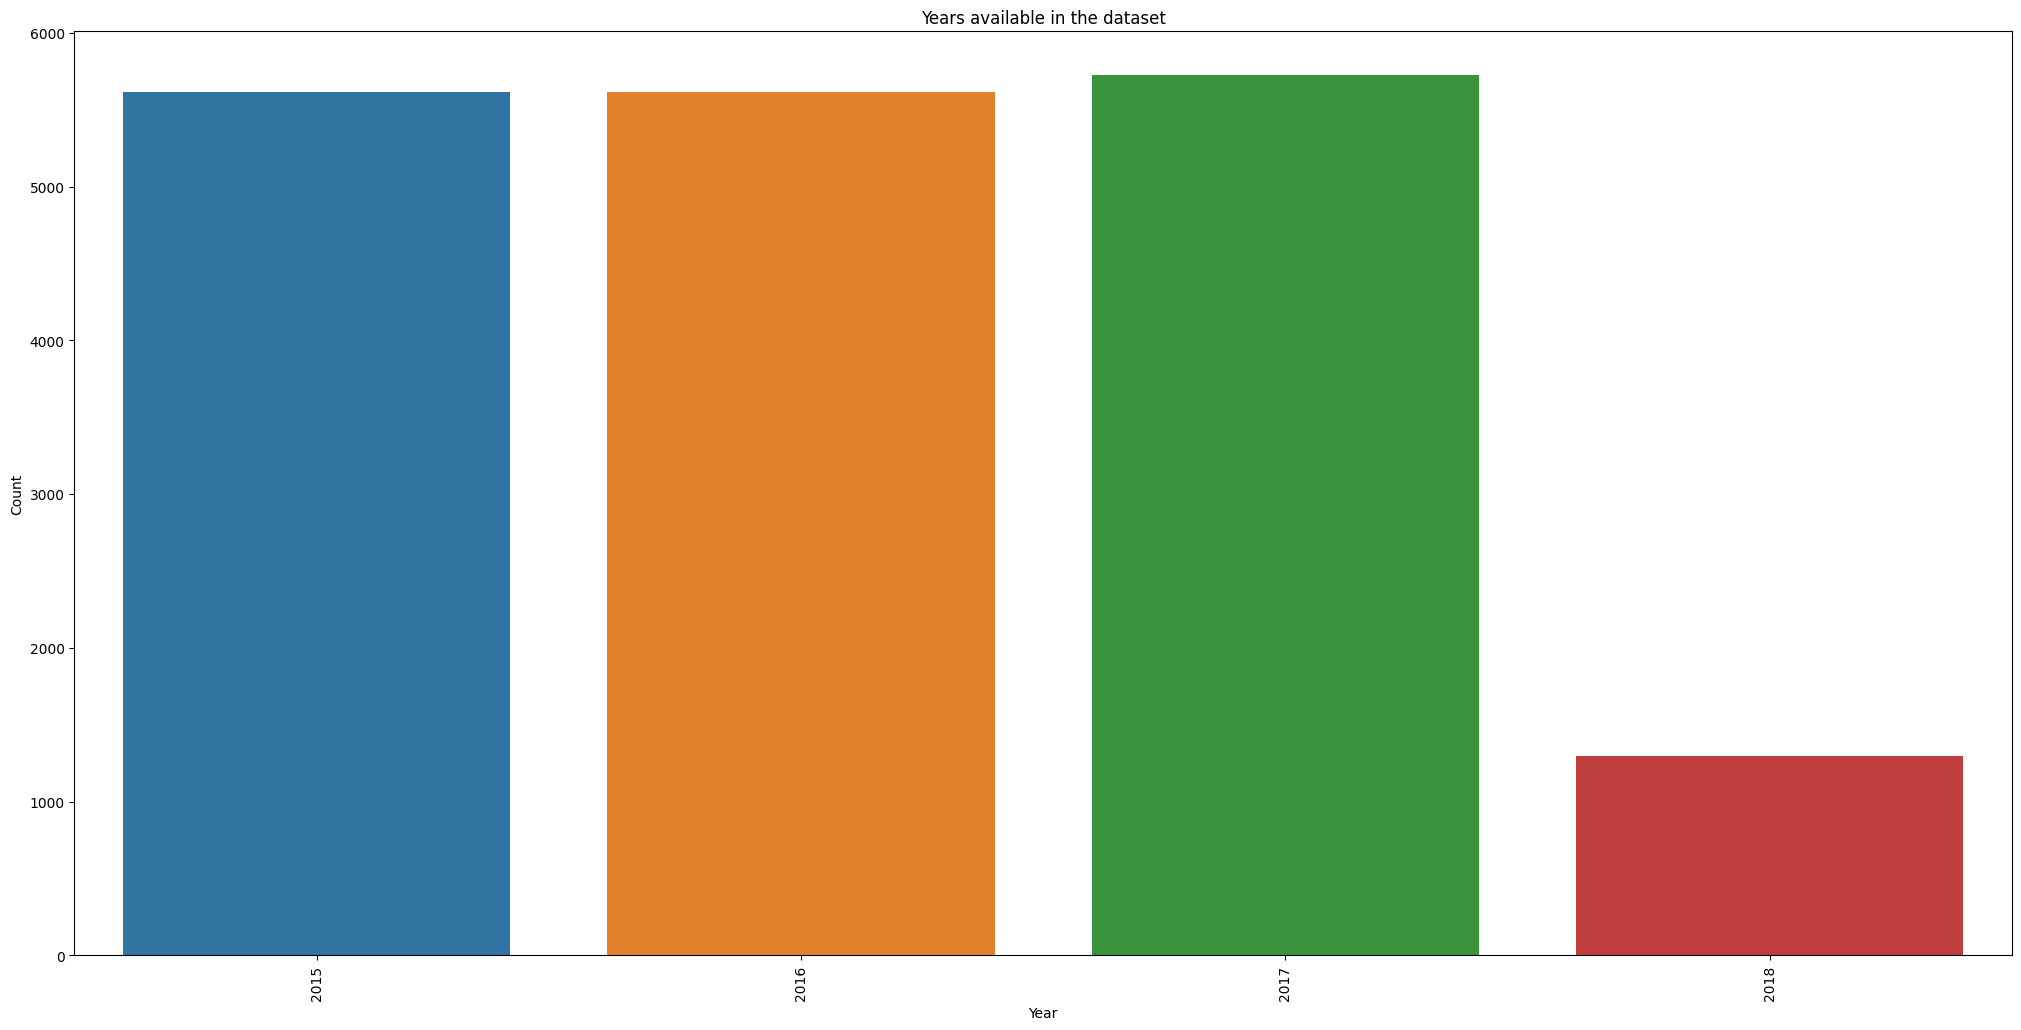

In [9]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = df)
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Years available in the dataset')
plt.savefig('./graphs/Years available in the dataset.png')

# Preparar los datos para que se acoplen a lo que requiere el modelo a utilizar

In [10]:
p_df = df[['Date', 'AveragePrice']] 
p_df

,Date,AveragePrice
51,2015-01-04,1.75
51,2015-01-04,1.49
51,2015-01-04,1.68
51,2015-01-04,1.52
51,2015-01-04,1.64
...,...,...
0,2018-03-25,1.36
0,2018-03-25,0.70
0,2018-03-25,1.42
0,2018-03-25,1.70


# Realizar predicciones

In [11]:
p_df = p_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})
p_df

,ds,y
51,2015-01-04,1.75
51,2015-01-04,1.49
51,2015-01-04,1.68
51,2015-01-04,1.52
51,2015-01-04,1.64
...,...,...
0,2018-03-25,1.36
0,2018-03-25,0.70
0,2018-03-25,1.42
0,2018-03-25,1.70


# Creación y ajuste del modelo

In [12]:
m = Prophet()
m.fit(p_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Pronosticar hacia el futuro un año (365 días)

In [ ]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast

# Graficar los datos históricos y los del futuro

In [ ]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price', figsize=(20,10))
figure.suptitle('Forecast of Avocado Prices in the US', fontsize=20)
figure.savefig('./graphs/Forecast avocado Total-US.png')

# Graficar los componentes del pronóstico

In [ ]:
figure2 = m.plot_components(forecast)
figure2.savefig('./graphs/Forecast avocado Total-US components.png')

# PARTE 2

### Repetir el ejercicio pero solo con la región oeste "West" de los EEUU

### Leer el archivo de datos

In [ ]:
avocado_df = pd.read_csv('aguacates_EEUU.csv', index_col= 'Unnamed: 0')

In [ ]:
avocado_df

In [ ]:
avocado_df_sample = avocado_df[avocado_df['region']=='West']
avocado_df_sample

### Por si acaso no están ordenadas las observaciones

In [ ]:
avocado_df_sample = avocado_df_sample.sort_values("Date")
avocado_df_sample

# Graficar el precio promedio vs fecha

### ¿Es diferente la tendencia comparado a la tendencia nacional?

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('Average Price')
plt.title('Average Price of Avocados in the West')
plt.savefig('./graphs/Average Price of Avocados in the West.png')
plt.show()

# Crear el modelo y ajustarlo con los datos

### Preparar los datos para que sean aceptados por el modelo a usar

In [ ]:
avocado_df_sample = avocado_df_sample.rename(columns={'Date':'ds', 'AveragePrice':'y'})

# Pronosticar al futuro un año (365 días)

In [ ]:
m = Prophet()
m.fit(avocado_df_sample)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

# Graficar datos históricos y pronosticados

In [ ]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')
figure.suptitle('Forecast of Avocado Prices in the West', fontsize=20)
figure.savefig('./graphs/Forecast avocado in the West.png')

In [ ]:
figure2 = m.plot_components(forecast)
figure2.savefig('./graphs/Forecast avocacdo in the West components.png')

### Conclusiones
* La venta de aguacates en la zona Oeste ('West') seguirá siendo un mercado con un incremento lineal. Se estima que el consumo de aguacates continúe creciendo a diferencia de la venta nacional, el cual no muestra un incremento de ventas a futuro.